plot the difference

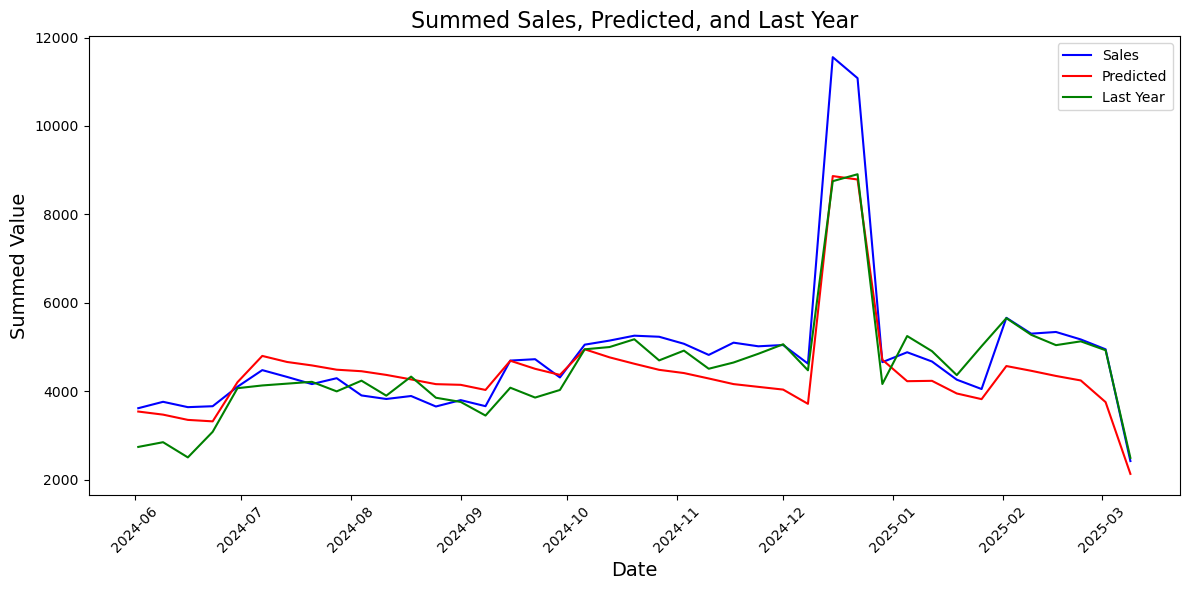

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a dataframe 'df' with columns 'date', 'sales', 'predicted', and 'ly'
# If not, you'll need to create or load your dataframe first
# Load the predictions CSV file
file_path = "/home/py/data/PREDICT_SALES_v1/data/processed/predictions.csv"
df1 = pd.read_csv(file_path)
df = df1[(df1['epoch_week'] >= 2839) & (df1['epoch_week'] <= 2879)].copy()

# Convert 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])
# Group by 'date' and sum the values for 'sales', 'predicted', and 'ly'
summed_df = df.groupby('date')[['sales', 'predict_avg_sales', 'ly']].sum()

# Plot the summed values as three separate series
plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(summed_df.index, summed_df['sales'], label='Sales', color='blue')
plt.plot(summed_df.index, summed_df['predict_avg_sales'], label='Predicted', color='red')
plt.plot(summed_df.index, summed_df['ly'], label='Last Year', color='green')

# Customize the plot
plt.title('Summed Sales, Predicted, and Last Year', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Summed Value', fontsize=14)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
import numpy as np

file_path = "/home/py/data/LGBM_ITEM_v1/data/raw/export_d.csv"
df = pd.read_csv(file_path)
print(f'Start shape:{df.shape}')
# Method 1: Scaling
scale_factor = 1.966
df['Scaled_Sales'] = df['SLS_UNT'] * scale_factor
df = df.drop('SLS_UNT',axis=1)
             
# Method 2: Adding Random Noise
# Set a noise level (e.g., 10% of the median sales value)
noise_level = 0.1 * df['Scaled_Sales'].median()
# Generate random noise
noise = np.random.normal(loc=0, scale=noise_level, size=df.shape[0])
df['Noisy_Sales'] = df['Scaled_Sales'] + noise
df = df.drop('Scaled_Sales',axis=1)

df['SLS_UNT'] = np.round(df['Noisy_Sales'] / 10) * 10
df = df.drop('Noisy_Sales',axis=1)
# Group by 'ITEM' and filter groups with at least 25 unique 'STARTDATE'
filtered_df = df.groupby('ITEM').filter(lambda x: x['STARTDATE'].nunique() >= 25)
# Print the original and obfuscated data
file_path = "/home/py/data/LGBM_ITEM_v1/data/raw/export_e.csv"
filtered_df.to_csv(file_path, index=False)
# counts = filtered_df.groupby(['ITEM', 'STARTDATE']).size().reset_index(name='counts')
# print(counts)
print(f'End shape:{filtered_df.shape}')

Start shape:(1001259, 8)
End shape:(847285, 8)


In [28]:
print(filtered_df.columns)

Index(['ITEM', 'CLS', 'SUBDEPT', 'DEPT', 'DIV', 'COMPANY', 'STARTDATE',
       'SLS_UNT'],
      dtype='object')
